<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%204/Modulo_4_Ejercicio_1_Confusion_Binaria_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 1: Análisis de Matriz de Confusión en Clasificación Binaria**
#### Evaluación del rendimiento de un modelo de clasificación en la predicción de fallas en sensores industriales

### **Introducción**
En este ejercicio, construiremos y analizaremos una **Matriz de Confusión** para evaluar el rendimiento de un modelo de clasificación binaria en la detección de fallas en sensores industriales.

El dataset utilizado contiene información sobre sensores en una línea de producción, y el objetivo es clasificar si un sensor fallará o no. Se analizarán métricas clave como **Precisión, Recall, F1 Score y Exactitud** para comprender cómo se comporta el modelo.

In [1]:
# Celda 1: Carga de librerías y configuración del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Configuración de gráficos
sns.set(style='whitegrid')

In [2]:
# Celda 2: Carga del dataset
dataset_path = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/fallas_sensores.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset
data.head()

,ID_sensor,Temperatura_operacion,Vibracion,Humedad,Presion,Corriente_electrica,Frecuencia_medicion,Tiempo_operacion,Tipo_sensor,Falla
0,1,82.450712,4.545892,49.020365,2.304435,12.147258,23,1186,Inductivo,No
1,2,72.926035,1.266968,66.237516,3.477414,9.729300,34,739,Capacitivo,No
2,3,84.715328,3.863156,79.323942,4.445244,10.133768,5,523,Inductivo,No
3,4,97.845448,2.071142,76.814784,2.182518,8.097643,59,1541,Inductivo,No
4,5,71.487699,2.508896,41.398791,1.409142,10.310082,12,1371,Capacitivo,No


In [3]:
# Celda 3: Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_sensor              100000 non-null  int64  
 1   Temperatura_operacion  100000 non-null  float64
 2   Vibracion              100000 non-null  float64
 3   Humedad                100000 non-null  float64
 4   Presion                100000 non-null  float64
 5   Corriente_electrica    100000 non-null  float64
 6   Frecuencia_medicion    100000 non-null  int64  
 7   Tiempo_operacion       100000 non-null  int64  
 8   Tipo_sensor            100000 non-null  object 
 9   Falla                  100000 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


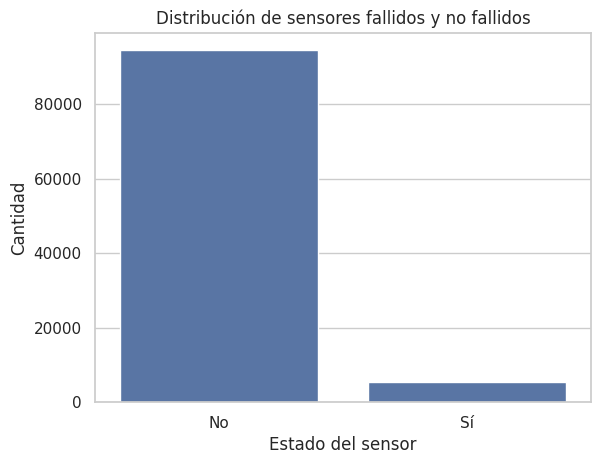

In [4]:
# Celda 4: Distribución de la variable objetivo
sns.countplot(x='Falla', data=data)
plt.title('Distribución de sensores fallidos y no fallidos')
plt.xlabel('Estado del sensor')
plt.ylabel('Cantidad')
plt.show()

### **Preprocesamiento de los datos**
Se realizará un proceso estándar de preparación de datos que incluye:
- Eliminación de duplicados.
- Imputación de valores faltantes.
- Codificación de variables categóricas.
- Normalización de variables numéricas.
- Aplicación de SMOTE para balancear las clases.

In [5]:
# Celda 5: Procesamiento de datos
# Eliminar duplicados
data = data.drop_duplicates()

# Imputar valores faltantes con la mediana para variables numéricas
numeric_features = ['Temperatura_operacion', 'Vibracion', 'Humedad', 'Presion', 'Corriente_electrica', 'Frecuencia_medicion', 'Tiempo_operacion']
imputer = SimpleImputer(strategy='median')
data[numeric_features] = imputer.fit_transform(data[numeric_features])

# Codificar variables categóricas con OneHotEncoder
categorical_features = ['Tipo_sensor']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Codificar la variable objetivo (No=0, Sí=1)
data['Falla'] = data['Falla'].map({'No': 0, 'Sí': 1})

# División en variables predictoras y objetivo
X = data.drop(columns=['Falla'])
y = data['Falla']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicación de SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Celda 6: Entrenamiento del modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [7]:
# Celda 7: Evaluación del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     18898
           1       0.06      0.08      0.07      1102

    accuracy                           0.87     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.90      0.87      0.88     20000



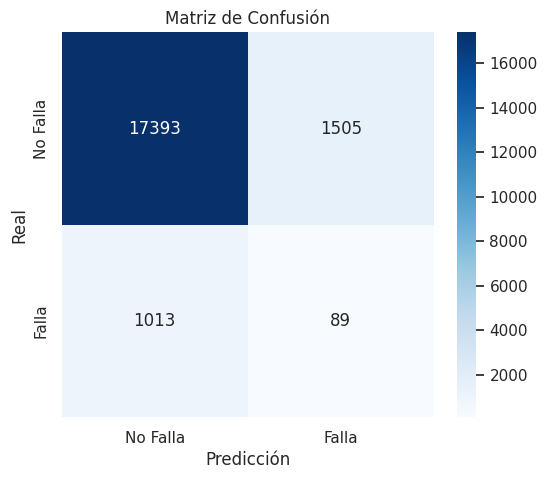

In [8]:
# Celda 8: Matriz de Confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Falla', 'Falla'], yticklabels=['No Falla', 'Falla'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### **Conclusiones**
- Se aplicó un proceso estándar de preprocesamiento de datos, incluyendo imputación, codificación y balanceo con SMOTE.
- **La Matriz de Confusión** muestra la cantidad de predicciones correctas e incorrectas en cada clase.
- **Precisión, Recall y F1 Score** permiten evaluar el desempeño del modelo en la clasificación de fallas en sensores.
- **Posibles mejoras:** Ajuste de hiperparámetros, prueba con modelos más avanzados como **XGBoost o Redes Neuronales**.